In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import copy
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('evaluation.csv')
df.head()

,Creator,Talk number,Overall Talk Quality,Powerpoint Quality
0,H,1,4,4
1,G,2,4,5
2,H,3,3,3
3,G,4,5,4
4,H,5,4,4


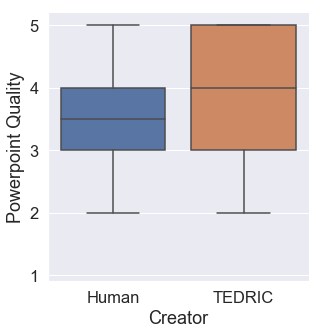

In [6]:
df = df.replace('H', 'Human')
df = df.replace('G', 'TEDRIC')

sns.set(font_scale=1.5)

g = sns.catplot(x="Creator",
                y="Powerpoint Quality", 
                kind='box',
                data=df)

axes = g.axes
axes[0,0].set_ylim(0.9,5.2)

# Save
g.savefig("powerpoint_quality_boxplot.png") 
g.savefig("powerpoint_quality_boxplot.eps") 

In [7]:
sns.set(font_scale=1.8)

# print(df)

sns.plt.xlim(1,5)
g= sns.catplot(x="Powerpoint Quality",hue="Creator",  kind="count", data=df);

# axes = g.axes
# axes[0,0].set_xlim(1,5)

# Save
g.savefig("powerpoint_quality_histogram.png") 
g.savefig("powerpoint_quality_histogram.eps") 

AttributeError: module 'seaborn' has no attribute 'plt'

In [ ]:
sns.set(font_scale=1.5)

g = sns.catplot(x="Creator",
                y="Overall Talk Quality", 
                kind='box',
                data=df)

axes = g.axes
axes[0,0].set_ylim(0.9,5.2)

# Save
g.savefig("overall_talk_quality_boxplot.png") 
g.savefig("overall_talk_quality_boxplot.eps") 

In [ ]:
human = df.loc[df['Creator'] == 'Human']['Powerpoint Quality']
tedric = df.loc[df['Creator'] == 'TEDRIC']['Powerpoint Quality']
stat, p = stats.ttest_ind(human, tedric)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

In [ ]:
## MannWhitney Test

stat, p = stats.mannwhitneyu(human, tedric)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

In [ ]:
print(len(human))

stat, p = stats.wilcoxon(human, tedric)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

In [ ]:
df_raw = pd.read_csv('raw_data.csv')
df_raw.head()
df_raw['Creator'] = df['Creator']

In [ ]:
sns.catplot(x="Creator", y="Powerpoint Quality", 
            hue="Evaluator ID", kind="point", 
            data=df_raw);

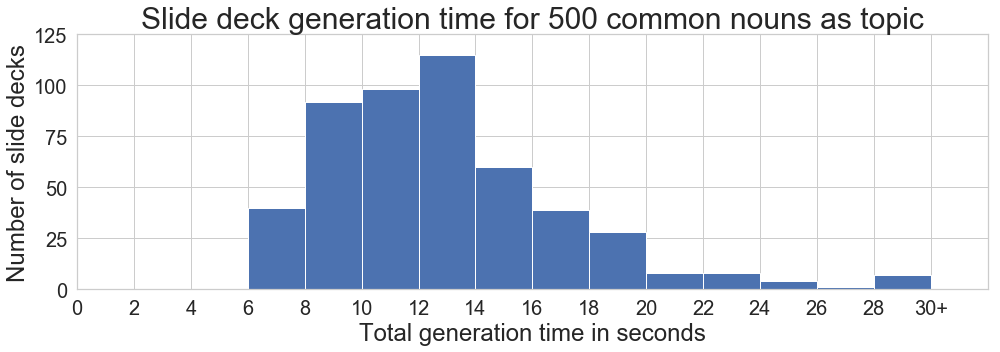

In [14]:
timing_data = pd.read_csv('timings.csv')
bin_width = 2
max_bin = 32
bins = np.arange(-bin_width,max_bin,bin_width)




fig, ax = plt.subplots(figsize=(14, 5))
_, bins, patches = plt.hist(x=np.clip(timing_data['total_time'], bins[0], bins[-1]),
                            bins=bins)

xlabels = bins[1:].astype(str)
xlabels[-1] += '+'

N_labels = len(xlabels)
plt.xlim([0, max_bin])
plt.xticks(bin_width*np.arange(N_labels), fontsize=20)
ax.set_xticklabels(xlabels)

plt.yticks(np.arange(0,150,25), fontsize=20)
plt.xlabel('Total generation time in seconds', fontsize=24)
plt.ylabel('Number of slide decks', fontsize=24)
plt.title('Slide deck generation time for 500 common nouns as topic', fontsize=30)
# plt.setp(patches, linewidth=0)
# plt.legend(loc='upper left')

fig.tight_layout()
plt.savefig("timings_histogram.eps") 

In [17]:
less_than_20_seconds = timing_data.loc[timing_data['total_time'] < 20]
print(len(less_than_20_seconds))

472
